# RLC Circuits

## Utils

In [1]:
import numpy as np
import scipy as sp
import scipy.constants as spc
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
MSE = lambda x, y: (x-y)**2
ABE = lambda x, y: np.abs(x-y)
def solve(Y, y_target, xi, xf, step_size, objective_id=0, xlabel='x', ylabel='y', loss=MSE, plot=True, plot_target=False, return_result=False):
    x = np.arange(xi, xf, step_size)
    y = Y(x)
    all_loss = loss(y, y_target)
    index = np.argmin(all_loss)
    x_f = x[index]
    if plot:
        fig, ax = plt.subplots()
        ax.plot(x, y, '--', label='Prediction')
        ax.plot(x_f, Y(x_f), 'x', label=f'Best Match = {x_f:.2e}, Error = {all_loss[index]:.2e}')
        ax.set_title(f'Resolution = {step_size}' + r' $\Omega$')
        if plot_target:
            ax.axhline(y_target, color='r', linestyle='--', alpha=0.7, label=f'Target = {y_target:.2e}')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid(True)
        ax.legend()
        if return_result:
            return x_f, ax
        else:
            plt.show()
            return
    return x_f

In [3]:
def parallel(a, b):
    return 1 / (1/a + 1/b)

## Circuits

In [4]:
w0 = 300e6
s = 1j * w0
L = 250e-9
C = 1e-12
Rp = 500e3

In [5]:
def RLC1(r):
    return parallel(r, parallel(s*L, 1/(s*C))).real

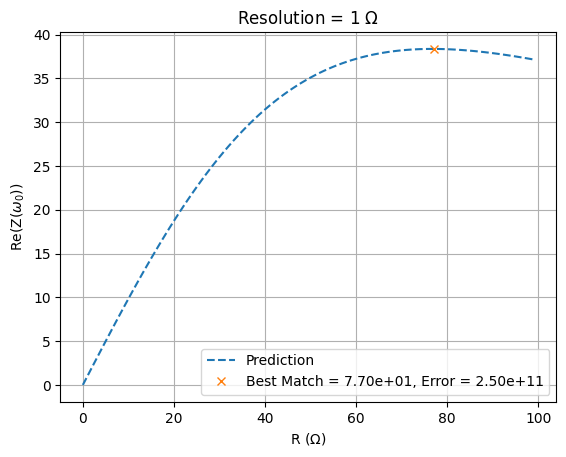

In [6]:
solve(RLC1, Rp, 1e-4, 1e2, 1, xlabel=r'R ($\Omega$)', ylabel=r'Re(Z($\omega_0$))')

In [7]:
def RLC2(r):
    return (r + parallel(s*L, 1/(s*C))).real

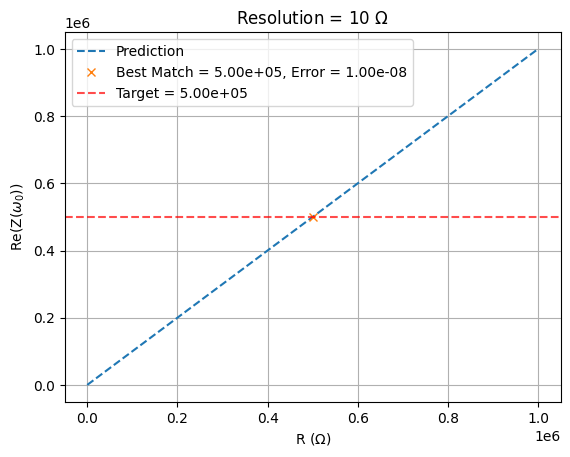

In [8]:
solve(RLC2, Rp, 1e-4, 1e6, 10, xlabel=r'R ($\Omega$)', ylabel=r'Re(Z($\omega_0$))', plot_target=True)

In [9]:
def RLC3(r):
    return parallel(r + 1/(s*C), s*L).real

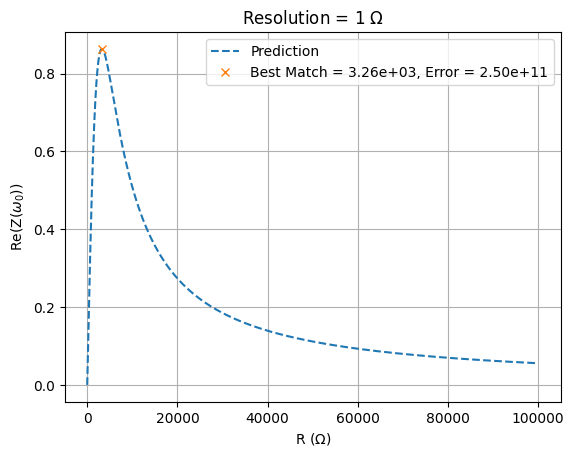

In [10]:
solve(RLC3, Rp, 1, 1e5, 1, xlabel=r'R ($\Omega$)', ylabel=r'Re(Z($\omega_0$))')

In [11]:
def RLC4(r):
    return parallel(1/(s*C), s*L+r).real

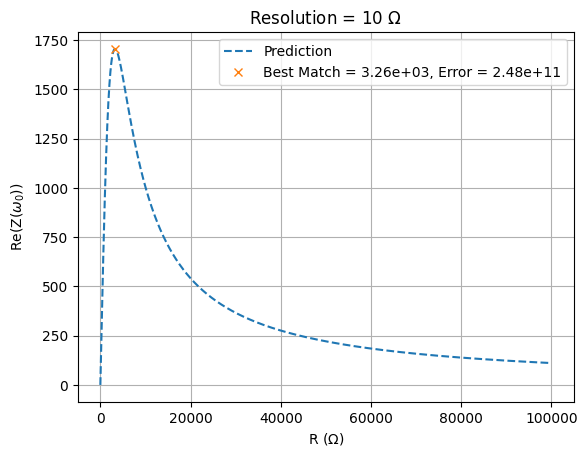

In [12]:
solve(RLC4, Rp, 0, 1e5, 10, xlabel=r'R ($\Omega$)', ylabel=r'Re(Z($\omega_0$))')